In [62]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

#mpl.rcParams['figure.dpi'] = 400  # good for presentation

# Business Problem:

In [3]:
filename = 'default_of_credit_card_clients__courseware_version_1_21_19.xls'
df = pd.read_excel(filename)

In [4]:
df.shape

(30000, 25)

# Helpful steps in *Data Exploration*

1. How many columns are there in the data?
2. How many rows(samples)
3. What kind of features are there? Which are categorical and which are numerical?
4. What does the data look like in these features. To see this, you can examine the range of values in numeric features, or the frequency of different classes in catergorical features, for example
5. Is there any missings data

In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df['ID'].nunique()

29687

In [8]:
df.shape

(30000, 25)

We see here that the number of unique ID is less than the number of rows. So we know there is some duplicate of IDs. But how much?

We gonna use *.value_counts()* (similar to a *group by/count* procedure in SQL).
It will list the unique IDs and thow often they occur.

In [10]:
id_counts = df['ID'].value_counts()

In [13]:
id_counts.head(2)

30729bb5-55d7    2
a9870d3e-b4d1    2
Name: ID, dtype: int64

In [14]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

We can see now that 29374 ID occur once, 313 occur twice and none occur more then twice 

# Boolean Masks

In [26]:
dupe_mask = id_counts == 2

In [27]:
dupe_mask[0:100]
#print(len(dupe_mask))
type(dupe_mask)

pandas.core.series.Series

In [18]:
id_counts.index[0:5]

Index(['30729bb5-55d7', 'a9870d3e-b4d1', '1bf3b4eb-d759', '327d06d5-ce7f',
       '85bd7f39-2e9b'],
      dtype='object')

In [28]:
dupe_ids = id_counts.index[dupe_mask]

In [29]:
dupe_ids = list(dupe_ids)

In [30]:
len(dupe_ids)

313

In [36]:
dupe_ids[0:6]

['30729bb5-55d7',
 'a9870d3e-b4d1',
 '1bf3b4eb-d759',
 '327d06d5-ce7f',
 '85bd7f39-2e9b',
 'accba688-8ec1']

We can see from the preceding output that the list contains the required entries of duplicate IDs. We can now examine the data for the IDs in our list od duplicates.

In [39]:
df['ID'].isin(dupe_ids[0:3])

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: ID, Length: 30000, dtype: bool

In [40]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1959,1bf3b4eb-d759,70000,2,3,1,57,0,0,0,0,...,49103,45830,46769,2620,2730,1936,1700,1700,2000,0
2059,1bf3b4eb-d759,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27333,30729bb5-55d7,110000,1,2,2,42,0,0,2,2,...,56309,58359,109312,5150,2000,0,2800,54000,0,0
27433,30729bb5-55d7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29369,a9870d3e-b4d1,320000,1,2,2,28,0,-1,-1,2,...,74838,72402,71847,70891,7001,21,3012,3015,2713,0
29469,a9870d3e-b4d1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df_zero_mask = df == 0

**df_zero_mask** is a DataFrame containing Boolean values.  
The goal will be to create a Boolean series, **feature_zero_mask**, that indentifies every row where all the elem are 0, starting from the secound column. We do that with  the integer indexing **iloc** method. We pass in ilod ":" to examine all rows and (1:) to examine all columns starting with the second one.  
Then we use the **all** method along the coloum axis **(axis=1)**

In [44]:
feature_zero_mask = df_zero_mask.iloc[:, 1:].all(axis=1)

In [45]:
df_clean_1 = df.loc[~feature_zero_mask, :].copy()

In [47]:
df_clean_1.shape

(29685, 25)

In [49]:
df_clean_1['ID'].nunique()

29685

### Summary  
1. We found out that the nuber of ID is not equal to the rows in the DataFrame
2. We found out that there were ID which occured twice
3. We indetify those rows and find out thaat those rows were filled with 0's and delete those rows  
### Methods 
isin()  
loc()  
iloc()  
all()  

Now we filtered out the duplicates ID, we can start looking at the actual data itself: the features and repsonses

In [50]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
ID                            29685 non-null object
LIMIT_BAL                     29685 non-null int64
SEX                           29685 non-null int64
EDUCATION                     29685 non-null int64
MARRIAGE                      29685 non-null int64
AGE                           29685 non-null int64
PAY_1                         29685 non-null object
PAY_2                         29685 non-null int64
PAY_3                         29685 non-null int64
PAY_4                         29685 non-null int64
PAY_5                         29685 non-null int64
PAY_6                         29685 non-null int64
BILL_AMT1                     29685 non-null int64
BILL_AMT2                     29685 non-null int64
BILL_AMT3                     29685 non-null int64
BILL_AMT4                     29685 non-null int64
BILL_AMT5                     29685 non-null int64
BILL_AMT6             

Most of the features are int64.  
Just ID and PAY_1 not. We will investigate on PAY_1 further since we know IDs

In [51]:
df_clean_1['PAY_1'].head()

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [54]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

Accorsding to the data dict, values from -1 till 9 are documented. We will now just remove the "Not available" data.

In [55]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [56]:
sum(valid_pay_1_mask)

26664

We see that 26664 rows donot have the value 'Not avaiable' in the PAY_1 column. Earlier we found out 3021 have this value and  
29685 - 3021 = 26664, so this checks out.

In [57]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask, :].copy()

In [58]:
df_clean_2.shape

(26664, 25)

Now that the  resulting DataFrame has the expected shape, we can solve the inconsistent data type with the others. We  
will cast it from the generic **object** to **int64**, using the **astype** method

In [59]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1','PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
PAY_1    26664 non-null int64
PAY_2    26664 non-null int64
dtypes: int64(2)
memory usage: 624.9 KB


# Data Quality Assurance and Exploration

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A823C88208>,
      dtype=object)

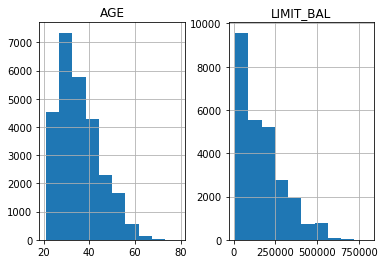

In [63]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [64]:
df_clean_2[['LIMIT_BAL','AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


We can make some judgements based on the histograms  and the convenient statistics computed by **describe()**  
The currency ist NT dollar (Taiwan) and 10000 NT ~ 330 US Dollar (Rate on 14.1.2019)  
LIMIT_BALL is at least 10000 NT and the minimum ageis 21. Both make sence.

Now we look at some categorical features. For example **EDUCATION**

In [65]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

We have some undocumented levels 0, 5 and 6. Since they are not prevalent, we will lumpt them in with others (4)

In [68]:
df_clean_2['EDUCATION'].replace(to_replace=[0,5,6], value = 4, inplace = True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [69]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

We proceed as we did with EDUCATION - lump in with others (3)

In [71]:
df_clean_2['MARRIAGE'].replace(to_replace = 0, value = 3, inplace = True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

### DEEP DIVE: Categorical Features